Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split


%matplotlib inline


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.shape

(381109, 12)

In [7]:
train, valid = train_test_split(df, test_size=.20, random_state = 101)

In [9]:
train.shape, valid.shape

((304887, 12), (76222, 12))

In [10]:
data = train.copy()

In [18]:
len(data.columns)

12

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304887 entries, 46954 to 176991
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    304887 non-null  int64  
 1   Gender                304887 non-null  object 
 2   Age                   304887 non-null  int64  
 3   Driving_License       304887 non-null  int64  
 4   Region_Code           304887 non-null  float64
 5   Previously_Insured    304887 non-null  int64  
 6   Vehicle_Age           304887 non-null  object 
 7   Vehicle_Damage        304887 non-null  object 
 8   Annual_Premium        304887 non-null  float64
 9   Policy_Sales_Channel  304887 non-null  float64
 10  Vintage               304887 non-null  int64  
 11  Response              304887 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 40.2+ MB


Categorical columns -    
                          
                          Gender

                          Driving license
    
                          Vehicle Age
        
                          Vehicle_Damage
            
                          Previously insured

** Region_Code should be in int not in float
                        

In [25]:
# for i in data.columns:
#     # data[i].value_counts()
#     print('-------')
#     print(data[i].value_counts())
#     print("range is ", data[i].min(), data[i].max())

data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000
mean,190433.972039,38.814380,0.997852,26.380361,0.458258,30567.067779,111.970248,154.348126,0.122862
std,110100.371946,15.498611,0.046300,13.232528,0.498255,17168.287391,54.223677,83.692384,0.328279
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,94964.500000,25.000000,1.000000,15.000000,0.000000,24406.000000,26.000000,82.000000,0.000000
50%,190456.000000,36.000000,1.000000,28.000000,0.000000,31681.000000,129.000000,154.000000,0.000000
75%,285891.000000,49.000000,1.000000,35.000000,1.000000,39398.000000,152.000000,227.000000,0.000000
max,381107.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


    Age range - 20 to 85
    Healh insurance value  - from 2630 to 540165
    Vintage (time with company) - 1 to 299 days

    

In [27]:
data['Response'].value_counts(normalize=True)*100

0    87.713809
1    12.286191
Name: Response, dtype: float64

In [26]:
data['Driving_License'].value_counts(normalize=True)

1    0.997852
0    0.002148
Name: Driving_License, dtype: float64

As 99.7% population has DL and we ae focussing on to sell vehicle insurance, we can remove those customers with no DL and then remove DL column

In [29]:
data['Previously_Insured'].value_counts()

0    165170
1    139717
Name: Previously_Insured, dtype: int64

In [30]:
data['Vehicle_Damage'].value_counts()

Yes    153941
No     150946
Name: Vehicle_Damage, dtype: int64

UVA

In [31]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [33]:
data['id'].nunique() # id is unique identifier

304887

In [40]:
def plot_cat(var,l=7,b=5):
    plt.figure(figsize=(l,b))
    sns.set(style="darkgrid")
    sns.countplot(x=data[var], data= data)

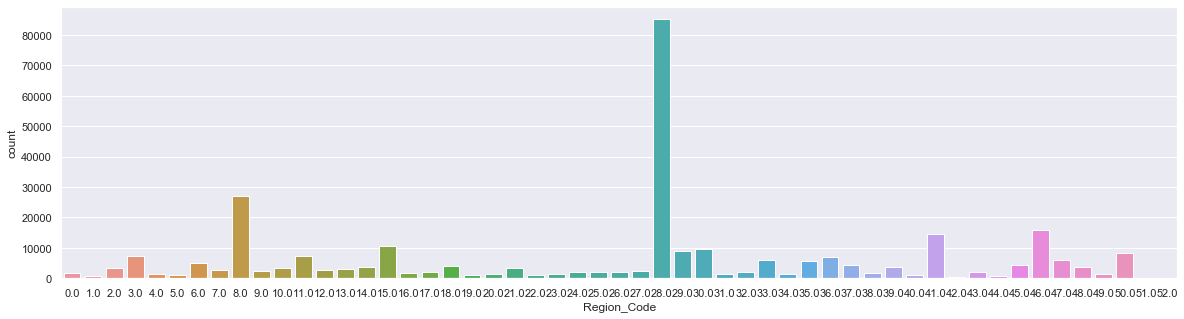

In [44]:
plot_cat('Region_Code',20,5)